In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
breast = load_breast_cancer()

In [7]:
breast_data = breast.data

In [8]:
breast_target = breast.target

In [9]:
labels = np.reshape(breast_target,(569,1))

In [10]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [11]:
final_breast_data.shape

(569, 31)

In [12]:
breast_dataset = pd.DataFrame(final_breast_data)

In [13]:
features = breast.feature_names

In [14]:
features_labels = np.append(features,'target')

In [15]:
breast_dataset.columns = features_labels

In [16]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [17]:
ds = breast_dataset.loc[:, features].values
ds = StandardScaler().fit_transform(ds)

In [18]:
ds.shape

(569, 30)

In [19]:
np.mean(ds),np.std(ds)

(-6.118909323768877e-16, 1.0)

In [20]:
X = ds
Y = breast_dataset.target

In [21]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=0)  

In [22]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred = clf.predict(x_test)
y_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.])

In [24]:
ac = accuracy_score(y_test,y_pred)
ac

0.9649122807017544

In [25]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(ds)

In [26]:
x_new = pd.DataFrame(data = principalComponents_breast, columns = ['PC 1', 'PC 2'])

In [27]:
x_new.head()

,PC 1,PC 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [28]:
x_new.shape

(569, 2)

In [29]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

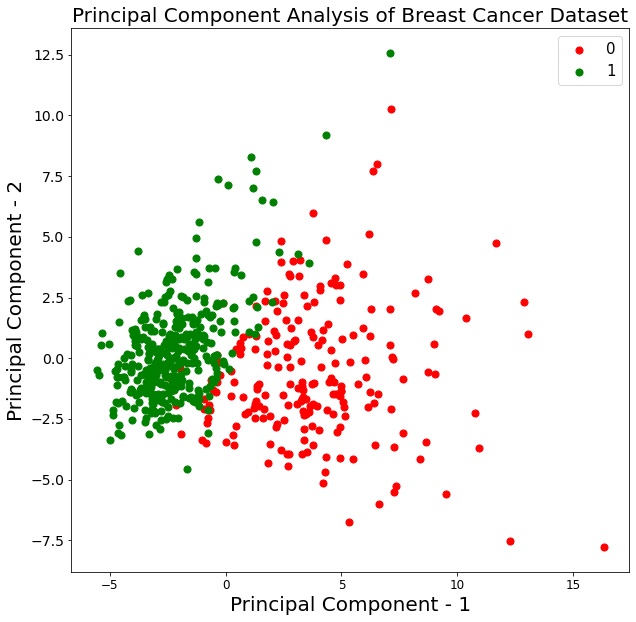

In [30]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['target'] == target
    plt.scatter(x_new.loc[indicesToKeep, 'PC 1']
               , x_new.loc[indicesToKeep, 'PC 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})